<a href="https://colab.research.google.com/github/stutigarg1/FMML-Projects-and-Assignments/blob/main/M3_Lab_4_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 **Section 1: Tweaking the parameters**

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn import datasets

In [44]:
cancer = datasets.load_breast_cancer(as_frame=True)

In [45]:
cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

In [46]:
cancer.frame

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [47]:
X = cancer.data
y = cancer.target

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 17)

**Section 1.1: Changing Value of K**

In [49]:
#different values of knn
neighbors = []
scores_list = []

for k in range(1, 25):
    neighbors.append(k)
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train,y_train)
    scores = knn.score(X_test,y_test)
    scores_list.append(scores)

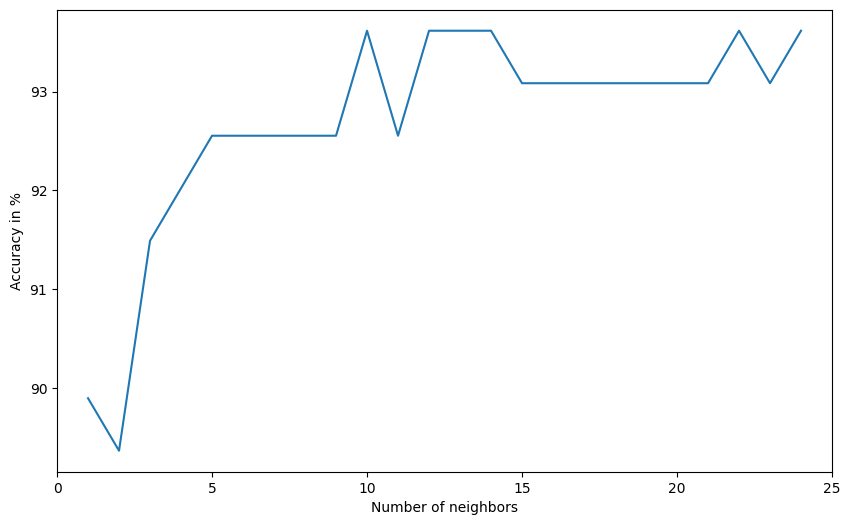

In [50]:
Accuracy = [x*100 for x in scores_list]
# plot Accuracy versus k
plt.figure(figsize = (10, 6))
plt.plot(neighbors, Accuracy)
plt.xlim([0, 25])
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy in %')
plt.show()

In [51]:
# determining the best k
max_acc = max(Accuracy)
optimal_ks = [neighbors[i] for i, j in enumerate(Accuracy) if j == max_acc]
print(max_acc)
print(optimal_ks)

93.61702127659575
[10, 12, 13, 14, 22, 24]


**AUC-ROC Curve**

In [52]:
## AUC-ROC
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt

def plot_roc(y_test,predicted):
  y_scores = predicted
  fpr, tpr, threshold = roc_curve(y_test, y_scores)
  roc_auc = auc(fpr, tpr)
  plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
  plt.legend(loc = 'lower right')
  plt.plot([0, 1], [0, 1],'r--')
  plt.xlim([0, 1])
  plt.ylim([0, 1])
  plt.ylabel('True Positive Rate')
  plt.xlabel('False Positive Rate')
  plt.title('Receiver Operating Characteristic')
  plt.show()

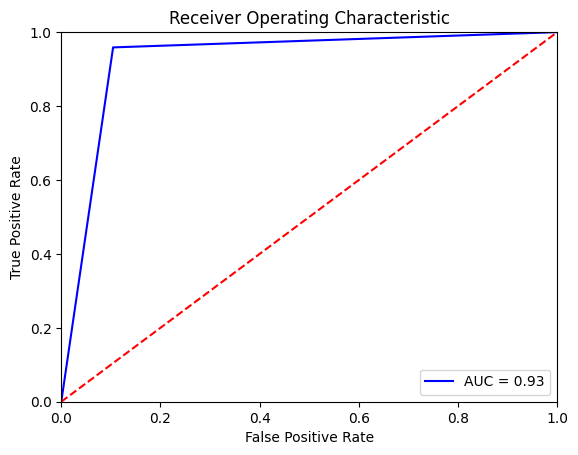

In [53]:
knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(X_train,y_train)
predictions = knn.predict(X_test)
plot_roc(y_test,predictions)

**Section 1.2: KNN using a different train-test split**

In [54]:
## Changing the random_state value here so that data is split differently
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 1089)

In [55]:
neighbors = []
scores_list = []

for k in range(1, 25):
    neighbors.append(k)
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train,y_train)
    scores = knn.score(X_test,y_test)
    scores_list.append(scores)

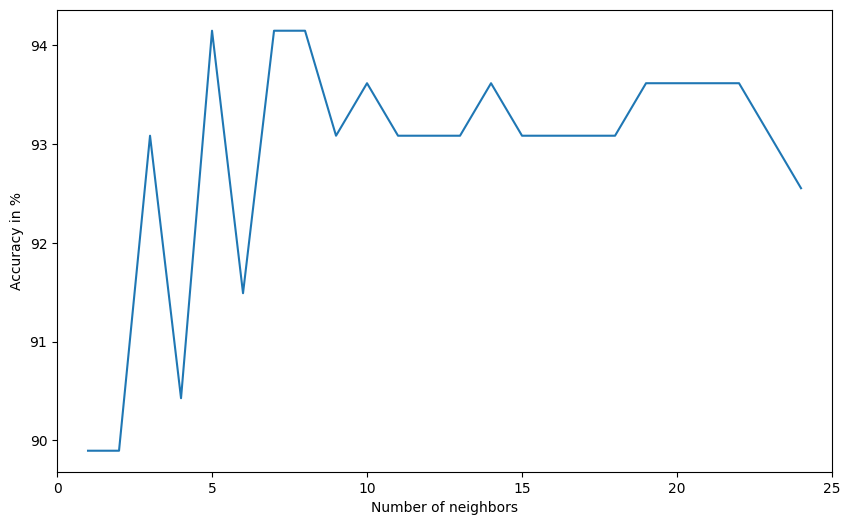

In [56]:
Accuracy = [x*100 for x in scores_list]
# plot Accuracy versus k
plt.figure(figsize = (10, 6))
plt.plot(neighbors, Accuracy)
plt.xlim([0, 25])
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy in %')
plt.show()

In [57]:
# determining the best k
max_acc = max(Accuracy)
optimal_ks = [neighbors[i] for i, j in enumerate(Accuracy) if j == max_acc]
print(max_acc)
print(optimal_ks)

94.14893617021278
[5, 7, 8]


**Section 2: Cross Validation**

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 17)

In [59]:
from sklearn.model_selection import KFold
from statistics import mean
kf = KFold(n_splits=10)
cv_scores = []
neighbors = []
for k in range(1,25):
  knn = KNeighborsClassifier(n_neighbors = k)
  neighbors.append(k)
  acclist = []
  for train_index, test_index in kf.split(X_train, y_train):
    x_train_fold, x_test_fold = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train_fold, y_test_fold = y_train.iloc[train_index], y_train.iloc[test_index]
    knn.fit(x_train_fold, y_train_fold)
    acclist.append(knn.score(x_test_fold, y_test_fold))
  cv_scores.append(mean(acclist))

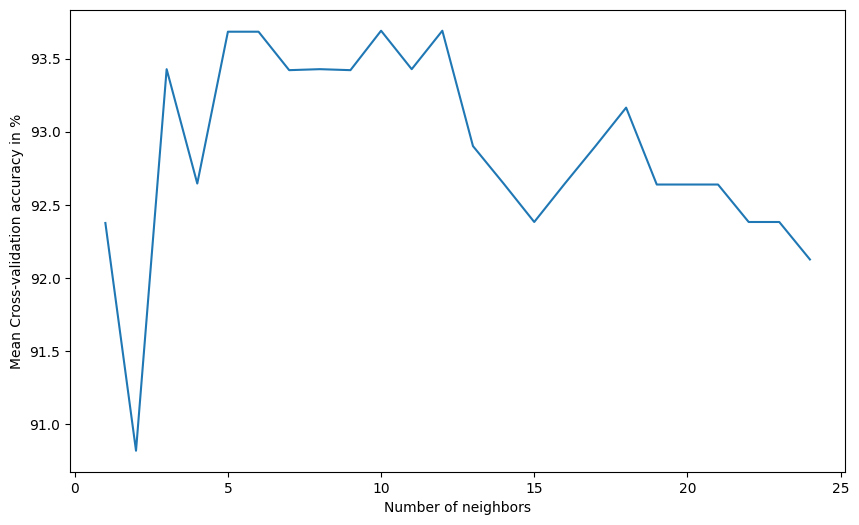

In [60]:
Accuracy = [x*100 for x in cv_scores]

# plot misclassification error versus k
plt.figure(figsize = (10, 6))
plt.plot(neighbors, Accuracy)
plt.xlabel('Number of neighbors')
plt.ylabel('Mean Cross-validation accuracy in %')
plt.show()

In [61]:
# determining the best k
max_acc = max(Accuracy)
optimal_ks = [neighbors[i] for i, j in enumerate(Accuracy) if j == max_acc]
print(optimal_ks)

[10, 12]


**Task-1:**
- In the above case, we saw K-Fold cross validation, where we split the dataset into K consecutive folds without taking anything else into account.
- Stratified KFold is another strategy that is commonly used, which preserves the percentage of samples for each class in the folds.
- Implement Stratified KFold (refer Sklearn docs) and display the results you obtain

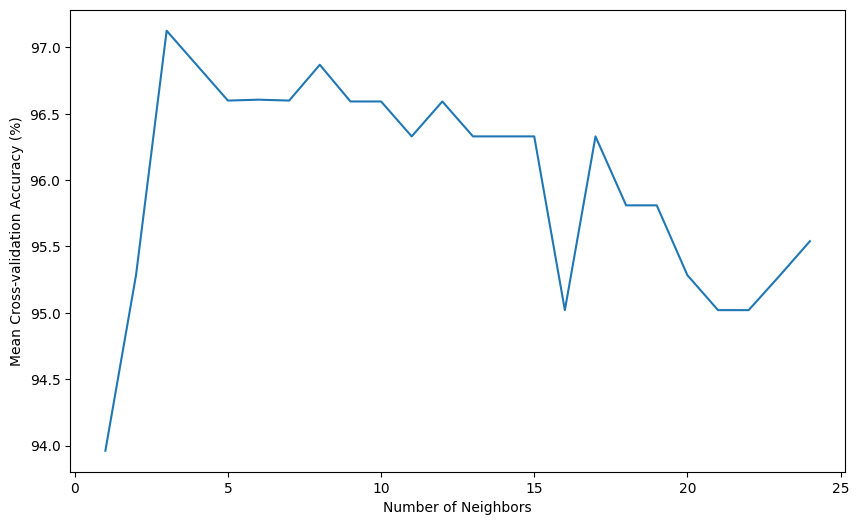

Optimal k values with highest accuracy: [3]


In [74]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

# Initializing StratifiedKFold
skf = StratifiedKFold(n_splits=10)

# Storingthe mean cross-validation accuracies for each k
cv_scores = []
neighbors = range(1, 25)

# Iterate over different values of k
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    # Perform cross-validation and store the mean accuracy
    scores = cross_val_score(knn, X_train, y_train, cv=skf, scoring='accuracy')
    cv_scores.append(scores.mean() * 100)

# Plotting the mean cross-validation accuracy vs. k
plt.figure(figsize=(10, 6))
plt.plot(neighbors, cv_scores)
plt.xlabel('Number of Neighbors')
plt.ylabel('Mean Cross-validation Accuracy (%)')
plt.show()

# Optimal value of k
max_acc = max(cv_scores)
optimal_ks = [k for k, acc in zip(neighbors, cv_scores) if acc == max_acc]
print("Optimal k values with highest accuracy:", optimal_ks)


**Section 3: Standardization**


In [63]:
X = cancer.data
y = cancer.target

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.33, random_state = 17)

In [66]:
neighbors = []
scores_list = []

for k in range(1, 25):
    neighbors.append(k)
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train,y_train)
    scores = knn.score(X_test,y_test)
    scores_list.append(scores)

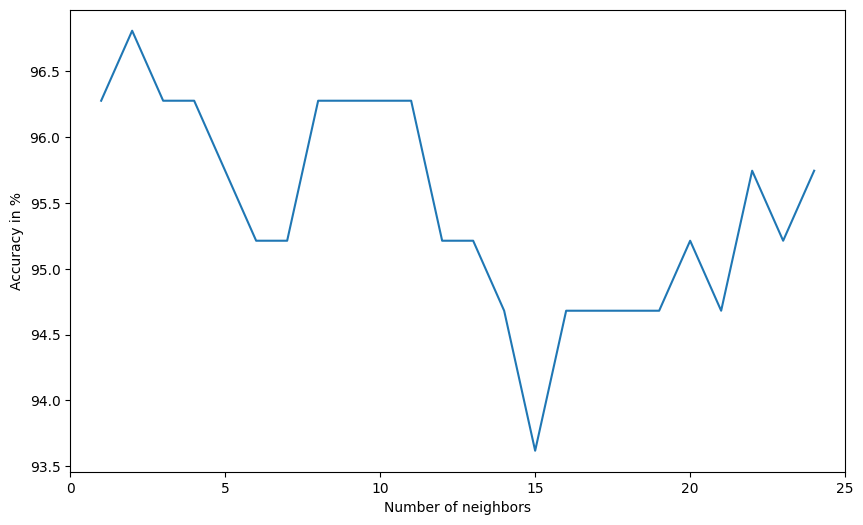

In [67]:
Accuracy = [x*100 for x in scores_list]
# plot Accuracy versus k
plt.figure(figsize = (10, 6))
plt.plot(neighbors, Accuracy)
plt.xlim([0, 25])
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy in %')
plt.show()

In [68]:
# determining the best k
max_acc = max(Accuracy)
optimal_ks = [neighbors[i] for i, j in enumerate(Accuracy) if j == max_acc]
print(max_acc)
print(optimal_ks)

96.80851063829788
[2]


**Task-2:**
- Plot a confusion matrix for the classification above on the scaled data (using the optimal value of k)
- Also print out the Precision, Recall and F1-score values

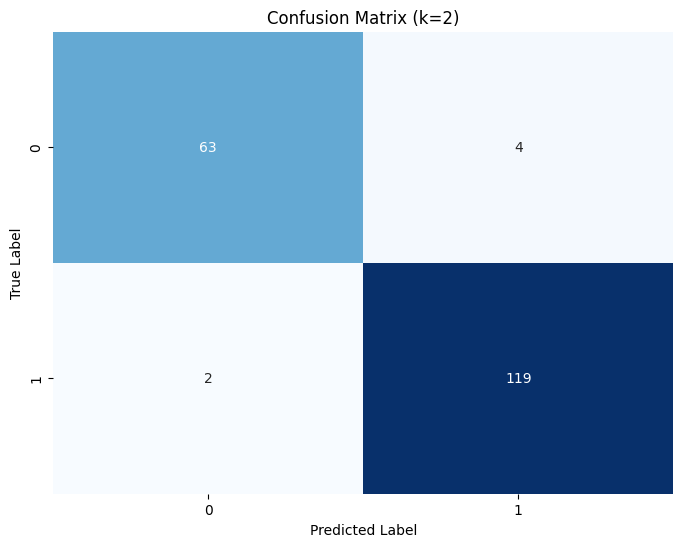

              precision    recall  f1-score   support

   Malignant       0.97      0.94      0.95        67
      Benign       0.97      0.98      0.98       121

    accuracy                           0.97       188
   macro avg       0.97      0.96      0.96       188
weighted avg       0.97      0.97      0.97       188



In [69]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# k=2 obtained from the previous task
optimal_k = 2
knn_optimal = KNeighborsClassifier(n_neighbors=optimal_k)
knn_optimal.fit(X_train, y_train)

# Predictions on the test set
y_pred = knn_optimal.predict(X_test)

# Plotting the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title(f'Confusion Matrix (k={optimal_k})')
plt.show()

# Printing precision, recall, and F1-score
report = classification_report(y_test, y_pred, target_names=['Malignant', 'Benign'])
print(report)


**Task-3:**
- Perform K-Fold Cross validation after standardizing the data. Display your results.

In [77]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# K-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Initializing the KNN model with the optimal k value
optimal_k = 2
knn = KNeighborsClassifier(n_neighbors=optimal_k)

# Evaluating the KNN model using cross-validation
scores = cross_val_score(knn, X_scaled, y, cv=kf)

print(f"Cross-Validation Accuracy Scores for each fold: {scores}")
print(f"Mean Accuracy: {np.mean(scores) * 100:.2f}%")
print(f"Standard Deviation: {np.std(scores) * 100:.2f}%")

Cross-Validation Accuracy Scores for each fold: [0.93859649 0.93859649 0.92982456 0.97368421 0.9380531 ]
Mean Accuracy: 94.38%
Standard Deviation: 1.53%


In [71]:
import pandas as pd
cancer_data = pd.DataFrame(X)
cancer_data_scaled = pd.DataFrame(X_scaled, columns=cancer_data.columns)

# Display the first few rows of the standardized data
print("First few rows of the standardized data:")
print(cancer_data_scaled.head())

First few rows of the standardized data:
   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0     1.097064     -2.073335        1.269934   0.984375         1.568466   
1     1.829821     -0.353632        1.685955   1.908708        -0.826962   
2     1.579888      0.456187        1.566503   1.558884         0.942210   
3    -0.768909      0.253732       -0.592687  -0.764464         3.283553   
4     1.750297     -1.151816        1.776573   1.826229         0.280372   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0          3.283515        2.652874             2.532475       2.217515   
1         -0.487072       -0.023846             0.548144       0.001392   
2          1.052926        1.363478             2.037231       0.939685   
3          3.402909        1.915897             1.451707       2.867383   
4          0.539340        1.371011             1.428493      -0.009560   

   mean fractal dimension  ...  worst radius  worst

**Task-4:**
- Perform K-Fold Cross validation after standardizing the data. Display your results.
- Plot the vornoi and decision boundary diagram for the classifier from TASK-3

In [72]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from scipy.spatial import Voronoi, voronoi_plot_2d
from matplotlib.colors import ListedColormap

# Standardizing the data and defining KNN
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
knn = KNeighborsClassifier(n_neighbors=2)

# K-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(knn, X_scaled, y, cv=kf)

# Display results
print(f"Accuracy: {scores.mean() * 100:.2f} ± {scores.std() * 100:.2f}%")

# Decision boundary and Voronoi diagram plotting
def plot_decision_boundary_and_voronoi(X, y):
    knn.fit(X, y)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))

    Z = knn.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

Accuracy: 94.38 ± 1.53%


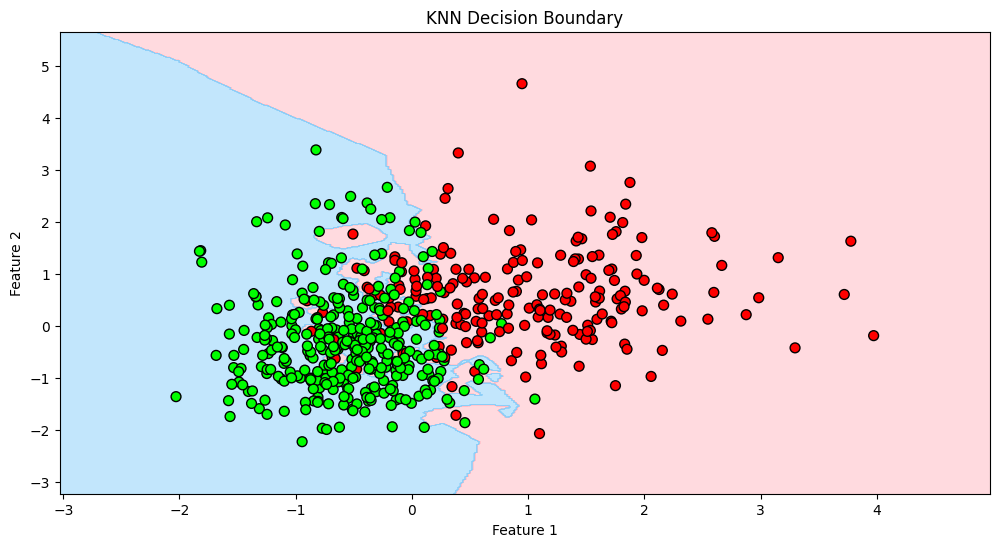

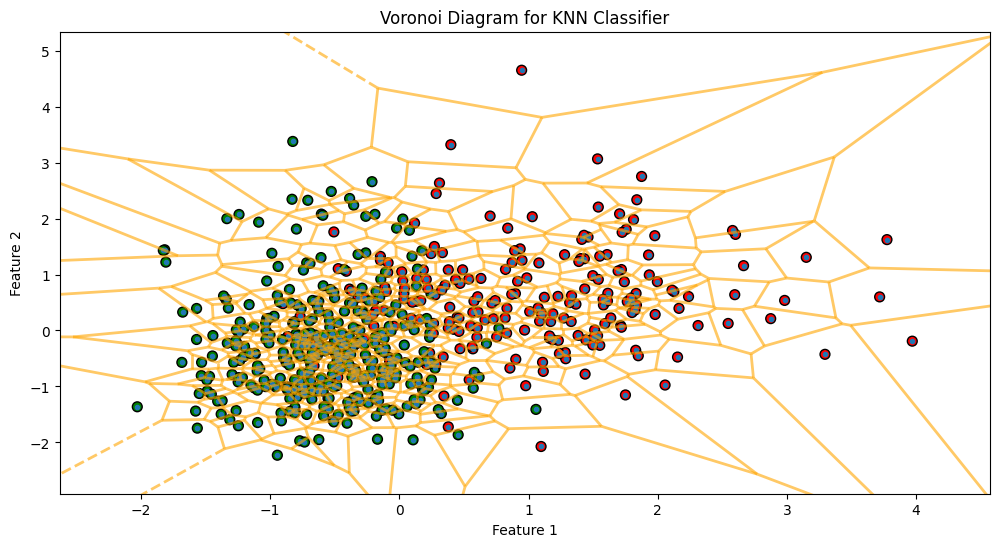

In [73]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from scipy.spatial import Voronoi, voronoi_plot_2d
from matplotlib.colors import ListedColormap

def plot_decision_boundary_and_voronoi(X, y):
    knn.fit(X, y)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))

    Z = knn.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # Plotting decision boundary
    plt.figure(figsize=(12, 6))
    plt.contourf(xx, yy, Z, alpha=0.5, cmap=ListedColormap(['#FFB6C1', '#87CEFA']))
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', s=50, cmap=ListedColormap(['#FF0000', '#00FF00']))
    plt.title('KNN Decision Boundary')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

    # Plotting Voronoi diagram
    vor = Voronoi(X)
    plt.figure(figsize=(12, 6))
    voronoi_plot_2d(vor, ax=plt.gca(), show_vertices=False, line_colors='orange', line_width=2, line_alpha=0.6)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', s=50, cmap=ListedColormap(['#FF0000', '#008000']))
    plt.title('Voronoi Diagram for KNN Classifier')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

plot_decision_boundary_and_voronoi(X_scaled[:, :2], y)

**Questions**

**Q1) Instead of using cross-validation, we could also split our dataset into three sets- train, validation, and test set. The training proceeds on the training set, after which evaluation is done on the validation set, and when the experiment seems to be successful, final evaluation can be done on the test set.**

**What do you think are the pros/cons of this method?**
- **Pros for the three-split model**
1. It’s simpler and faster than cross-validation, making it ideal when computational resources are limited.

2. A separate test set ensures an unbiased evaluation of the model's real-world performance.

3. Using a dedicated test set minimizes data leakage, keeping test data fully unseen during training and validation.

- **Cons for the three-split model**
1. A fixed split leaves less data for training, which can reduce model performance, especially with smaller datasets.

2. Using only one validation set can lead to higher variance in performance estimates if it doesn’t capture the full diversity of the data.

3. Iterative tuning based on a single validation set can lead to overfitting, reducing the model’s ability to generalize to new data.

**Q2) Is K-Fold cross validation an exhaustive or non-exhaustive cross validation method ? Justify your answer.**
- K-Fold cross-validation is a **non-exhaustive** cross-validation method.
- K-Fold divides the dataset into K parts (or folds). The model is trained K times, using K-1 folds for training and 1 fold for validation each time.

- It doesn't use every possible combination of data for training and validation. It follows a fixed pattern, cycling through the folds systematically.

- Moreover, it is more efficient than exhaustive methods (like Leave-One-Out Cross-Validation), as it doesn’t require training on every single data point as a separate validation set.

- The number of training/validation splits is determined by K, which means it doesn’t evaluate all possible configurations of the dataset.